[![Open In Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/github/danpele/Time-Series-Analysis/blob/main/EN/Seminar_Notebooks/chapter4_seminar_notebook.ipynb)

---

# Chapter 4 Seminar: SARIMA Models - Practice Exercises

**Course:** Time Series Analysis and Forecasting  
**Program:** Bachelor program, Faculty of Cybernetics, Statistics and Economic Informatics, Bucharest University of Economic Studies, Romania  
**Academic Year:** 2025-2026

---

## Seminar Objectives

1. Identify and visualize seasonal patterns in time series
2. Practice seasonal decomposition
3. Apply seasonal differencing
4. Fit and diagnose SARIMA models
5. Generate seasonal forecasts
6. Work with real economic data with seasonality

## Setup

In [1]:
# Core libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

# Time series
from statsmodels.tsa.statespace.sarimax import SARIMAX
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.stattools import adfuller, kpss, acf, pacf
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.stats.diagnostic import acorr_ljungbox
from scipy import stats

# Auto-ARIMA
try:
    import pmdarima as pm
except:
    !pip install pmdarima -q
    import pmdarima as pm

# Plotting style
plt.rcParams['figure.figsize'] = (12, 5)
plt.rcParams['font.size'] = 11
plt.rcParams['axes.facecolor'] = 'none'
plt.rcParams['figure.facecolor'] = 'none'
plt.rcParams['savefig.facecolor'] = 'none'
plt.rcParams['savefig.transparent'] = True
plt.rcParams['legend.frameon'] = False
plt.rcParams['axes.grid'] = False
plt.rcParams['axes.spines.top'] = False
plt.rcParams['axes.spines.right'] = False

COLORS = {'blue': '#1A3A6E', 'red': '#DC3545', 'green': '#2E7D32', 'orange': '#E67E22'}

print("Setup complete!")

Setup complete!


---
# Part 1: Multiple Choice Quiz (20 Questions)

Answer the following questions about SARIMA models. Run each cell after entering your answer to check if you're correct.

### Quiz 1: Seasonal Period

**Question:** For monthly data with an annual seasonal pattern, what is the seasonal period $s$?

- A) $s = 4$
- B) $s = 7$
- C) $s = 12$
- D) $s = 52$

In [2]:
# Enter your answer: 'A', 'B', 'C', or 'D'
quiz1_answer = ''  # <-- Enter your answer here

# Check answer
if quiz1_answer.upper() == 'C':
    print("✓ CORRECT!")
    print("Monthly data has 12 observations per year, so s = 12.")
    print("Similarly: quarterly → s=4, weekly → s=52, daily with weekly pattern → s=7")
elif quiz1_answer:
    print("✗ Incorrect. Try again!")
    print("Hint: How many months are in one complete seasonal cycle (one year)?")

### Quiz 2: Seasonal Differencing

**Question:** What does the operator $(1-L^{12})$ do to a time series $Y_t$?

- A) Removes the trend by subtracting the previous observation
- B) Computes the difference between $Y_t$ and $Y_{t-12}$ (same month last year)
- C) Computes the 12-period moving average
- D) Raises each observation to the 12th power

In [3]:
# Enter your answer: 'A', 'B', 'C', or 'D'
quiz2_answer = ''  # <-- Enter your answer here

# Check answer
if quiz2_answer.upper() == 'B':
    print("✓ CORRECT!")
    print("(1-L^12)Y_t = Y_t - L^12(Y_t) = Y_t - Y_{t-12}")
    print("This compares each observation to the same period one year ago,")
    print("effectively removing the seasonal pattern.")
elif quiz2_answer:
    print("✗ Incorrect. Try again!")
    print("Hint: L^12 shifts the series back by 12 periods. What is Y_t - Y_{t-12}?")

### Quiz 3: SARIMA Notation

**Question:** In SARIMA$(p,d,q) \times (P,D,Q)_s$, what does $D$ represent?

- A) Non-seasonal differencing order
- B) Seasonal differencing order
- C) Seasonal MA order
- D) The data dimension

In [4]:
# Enter your answer: 'A', 'B', 'C', or 'D'
quiz3_answer = ''  # <-- Enter your answer here

# Check answer
if quiz3_answer.upper() == 'B':
    print("✓ CORRECT!")
    print("D = Seasonal differencing order (number of times to apply (1-L^s))")
    print("d = Non-seasonal differencing order (number of times to apply (1-L))")
    print("P, Q = Seasonal AR and MA orders")
elif quiz3_answer:
    print("✗ Incorrect. Try again!")
    print("Hint: Capital letters (P, D, Q) refer to SEASONAL components.")

### Quiz 4: The Airline Model

**Question:** The famous "airline model" is SARIMA$(0,1,1) \times (0,1,1)_{12}$. How many parameters does it have (excluding variance)?

- A) 1
- B) 2
- C) 4
- D) 6

In [5]:
# Enter your answer: 'A', 'B', 'C', or 'D'
quiz4_answer = ''  # <-- Enter your answer here

# Check answer
if quiz4_answer.upper() == 'B':
    print("✓ CORRECT!")
    print("The airline model has only 2 parameters:")
    print("  θ₁ = non-seasonal MA coefficient")
    print("  Θ₁ = seasonal MA coefficient")
    print("Despite its simplicity, it works remarkably well for many seasonal series!")
elif quiz4_answer:
    print("✗ Incorrect. Try again!")
    print("Hint: q=1 gives one MA parameter, Q=1 gives one seasonal MA parameter.")

### Quiz 5: Multiplicative Seasonality

**Question:** If seasonal amplitude grows with the level of the series, what type of seasonality is present?

- A) Additive
- B) Multiplicative
- C) Deterministic
- D) Irregular

In [6]:
# Enter your answer: 'A', 'B', 'C', or 'D'
quiz5_answer = ''  # <-- Enter your answer here

# Check answer
if quiz5_answer.upper() == 'B':
    print("✓ CORRECT!")
    print("Multiplicative seasonality: Y = Trend × Seasonal × Error")
    print("The seasonal swing is proportional to the level.")
    print("Solution: Use log transformation → log(Y) = log(T) + log(S) + log(E)")
elif quiz5_answer:
    print("✗ Incorrect. Try again!")
    print("Hint: If seasonality is additive, the amplitude stays constant regardless of level.")

### Quiz 6: Log Transformation

**Question:** Why do we apply log transformation before fitting SARIMA to airline passenger data?

- A) To make the data positive
- B) To convert multiplicative seasonality to additive
- C) To reduce the number of observations
- D) To make the model run faster

In [7]:
# Enter your answer: 'A', 'B', 'C', or 'D'
quiz6_answer = ''  # <-- Enter your answer here

# Check answer
if quiz6_answer.upper() == 'B':
    print("✓ CORRECT!")
    print("log(Y) = log(Trend × Seasonal × Error)")
    print("       = log(Trend) + log(Seasonal) + log(Error)")
    print("This converts multiplicative to additive, which SARIMA handles directly.")
elif quiz6_answer:
    print("✗ Incorrect. Try again!")
    print("Hint: Think about how logarithms transform products into sums.")

### Quiz 7: ACF at Seasonal Lags

**Question:** For monthly data, you observe significant ACF spikes at lags 12, 24, 36. What does this suggest?

- A) The data is white noise
- B) There is seasonality that needs to be modeled
- C) The model is overfitting
- D) The data has no pattern

In [8]:
# Enter your answer: 'A', 'B', 'C', or 'D'
quiz7_answer = ''  # <-- Enter your answer here

# Check answer
if quiz7_answer.upper() == 'B':
    print("✓ CORRECT!")
    print("Significant ACF at seasonal lags (s, 2s, 3s, ...) indicates seasonality.")
    print("This is the key signature of seasonal correlation in the data.")
    print("Use seasonal AR (P) or MA (Q) components to model this pattern.")
elif quiz7_answer:
    print("✗ Incorrect. Try again!")
    print("Hint: Spikes at multiples of 12 suggest observations are correlated with the same month in previous years.")

### Quiz 8: Combined Differencing

**Question:** The operator $(1-L)(1-L^{12})$ removes:

- A) Only trend
- B) Only seasonality
- C) Both trend and seasonality
- D) Neither trend nor seasonality

In [9]:
# Enter your answer: 'A', 'B', 'C', or 'D'
quiz8_answer = ''  # <-- Enter your answer here

# Check answer
if quiz8_answer.upper() == 'C':
    print("✓ CORRECT!")
    print("(1-L) removes the trend (regular unit root)")
    print("(1-L^12) removes the seasonality (seasonal unit root)")
    print("Together they make a series with both trend AND seasonality stationary.")
elif quiz8_answer:
    print("✗ Incorrect. Try again!")
    print("Hint: Each operator addresses a different source of non-stationarity.")

### Quiz 9: Seasonal MA Identification

**Question:** After differencing, the ACF shows a significant spike ONLY at lag 12 and the PACF decays at seasonal lags. This suggests:

- A) Seasonal AR: $P > 0, Q = 0$
- B) Seasonal MA: $P = 0, Q > 0$
- C) Non-seasonal AR
- D) White noise

In [10]:
# Enter your answer: 'A', 'B', 'C', or 'D'
quiz9_answer = ''  # <-- Enter your answer here

# Check answer
if quiz9_answer.upper() == 'B':
    print("✓ CORRECT!")
    print("This is the seasonal analog of MA identification:")
    print("  - ACF cuts off at seasonal lag → Seasonal MA (Q)")
    print("  - PACF decays at seasonal lags → confirms MA structure")
    print("A single spike at lag 12 suggests Q=1.")
elif quiz9_answer:
    print("✗ Incorrect. Try again!")
    print("Hint: Apply the same ACF/PACF rules as for non-seasonal, but at seasonal lags.")

### Quiz 10: Model Selection

**Question:** When comparing SARIMA models, which criterion penalizes complexity more for large samples?

- A) AIC
- B) BIC
- C) Both penalize equally
- D) RMSE

In [11]:
# Enter your answer: 'A', 'B', 'C', or 'D'
quiz10_answer = ''  # <-- Enter your answer here

# Check answer
if quiz10_answer.upper() == 'B':
    print("✓ CORRECT!")
    print("AIC penalty: 2k")
    print("BIC penalty: k·log(n)")
    print("For n > 8: log(n) > 2, so BIC penalizes more.")
    print("BIC tends to select simpler models, especially with large samples.")
elif quiz10_answer:
    print("✗ Incorrect. Try again!")
    print("Hint: Compare 2k vs k·log(n). When n is large, which is bigger?")

### Quiz 11: Over-differencing

**Question:** A strong negative ACF at lag 1 (around -0.5) after differencing suggests:

- A) The model is correctly specified
- B) Over-differencing has occurred
- C) More differencing is needed
- D) The series is already stationary

In [12]:
# Enter your answer: 'A', 'B', 'C', or 'D'
quiz11_answer = ''  # <-- Enter your answer here

# Check answer
if quiz11_answer.upper() == 'B':
    print("✓ CORRECT!")
    print("Over-differencing introduces artificial negative autocorrelation.")
    print("ACF(1) ≈ -0.5 is a classic sign of over-differencing.")
    print("Solution: Reduce d or D by 1.")
elif quiz11_answer:
    print("✗ Incorrect. Try again!")
    print("Hint: When you difference a stationary series, you introduce negative correlation.")

### Quiz 12: Residual Diagnostics

**Question:** After fitting a SARIMA model, the Ljung-Box test on residuals gives p-value = 0.35. This means:

- A) The model is inadequate
- B) Residuals have significant autocorrelation
- C) Residuals appear to be white noise (model is adequate)
- D) The model is overfitting

In [13]:
# Enter your answer: 'A', 'B', 'C', or 'D'
quiz12_answer = ''  # <-- Enter your answer here

# Check answer
if quiz12_answer.upper() == 'C':
    print("✓ CORRECT!")
    print("Ljung-Box test: H₀ = residuals are white noise")
    print("p-value = 0.35 > 0.05 → Do NOT reject H₀")
    print("Conclusion: Residuals are consistent with white noise.")
    print("The model has captured all systematic patterns in the data.")
elif quiz12_answer:
    print("✗ Incorrect. Try again!")
    print("Hint: High p-value means we fail to reject the null hypothesis of no autocorrelation.")

### Quiz 13: Forecast Intervals

**Question:** For a SARIMA model with $d=1$ and $D=1$, forecast confidence intervals:

- A) Stay constant as the horizon increases
- B) Shrink as the horizon increases
- C) Grow without bound as the horizon increases
- D) Oscillate with the seasonal pattern

In [14]:
# Enter your answer: 'A', 'B', 'C', or 'D'
quiz13_answer = ''  # <-- Enter your answer here

# Check answer
if quiz13_answer.upper() == 'C':
    print("✓ CORRECT!")
    print("With d≥1 or D≥1, the series has unit root(s).")
    print("This means forecast variance grows with horizon → unbounded intervals.")
    print("Long-term forecasts become increasingly uncertain.")
elif quiz13_answer:
    print("✗ Incorrect. Try again!")
    print("Hint: Unit roots cause shock persistence, which affects long-term forecast uncertainty.")

### Quiz 14: Quarterly Data

**Question:** For quarterly data with annual seasonality, the appropriate SARIMA model is:

- A) SARIMA$(p,d,q) \times (P,D,Q)_4$
- B) SARIMA$(p,d,q) \times (P,D,Q)_{12}$
- C) SARIMA$(p,d,q) \times (P,D,Q)_{52}$
- D) SARIMA$(p,d,q) \times (P,D,Q)_1$

In [15]:
# Enter your answer: 'A', 'B', 'C', or 'D'
quiz14_answer = ''  # <-- Enter your answer here

# Check answer
if quiz14_answer.upper() == 'A':
    print("✓ CORRECT!")
    print("Quarterly data has 4 observations per year.")
    print("s = 4 for quarterly data with annual pattern.")
    print("Common examples: GDP, employment, earnings")
elif quiz14_answer:
    print("✗ Incorrect. Try again!")
    print("Hint: How many quarters are in one year (one seasonal cycle)?")

### Quiz 15: Seasonal AR vs Seasonal MA

**Question:** If the PACF cuts off at lag 12 while ACF decays at seasonal lags, this suggests:

- A) Seasonal MA (Q > 0)
- B) Seasonal AR (P > 0)
- C) No seasonal component needed
- D) Non-seasonal ARMA only

In [16]:
# Enter your answer: 'A', 'B', 'C', or 'D'
quiz15_answer = ''  # <-- Enter your answer here

# Check answer
if quiz15_answer.upper() == 'B':
    print("✓ CORRECT!")
    print("This is the AR signature at seasonal lags:")
    print("  - PACF cuts off at seasonal lag → Seasonal AR (P)")
    print("  - ACF decays at seasonal lags → confirms AR structure")
    print("Use P=1 if PACF cuts off at lag s, P=2 if at lag 2s, etc.")
elif quiz15_answer:
    print("✗ Incorrect. Try again!")
    print("Hint: PACF cut-off suggests AR; ACF cut-off suggests MA (same rule as non-seasonal).")

### Quiz 16: Decomposition Methods

**Question:** Which decomposition method should be used when seasonal amplitude is constant over time?

- A) Multiplicative decomposition
- B) Additive decomposition
- C) X-13ARIMA-SEATS
- D) Fourier decomposition

In [17]:
# Enter your answer: 'A', 'B', 'C', or 'D'
quiz16_answer = ''  # <-- Enter your answer here

# Check answer
if quiz16_answer.upper() == 'B':
    print("✓ CORRECT!")
    print("Additive: Y = Trend + Seasonal + Error")
    print("Use when seasonal amplitude stays constant regardless of level.")
    print("Multiplicative is used when amplitude grows with level.")
elif quiz16_answer:
    print("✗ Incorrect. Try again!")
    print("Hint: Constant amplitude means the seasonal effect is added, not multiplied.")

### Quiz 17: Multiplicative Structure

**Question:** In the airline model $(1-L)(1-L^{12})Y_t = (1+\theta L)(1+\Theta L^{12})\varepsilon_t$, the MA polynomials are multiplied. How many terms does $(1+\theta L)(1+\Theta L^{12})$ expand to?

- A) 2 terms
- B) 3 terms
- C) 4 terms
- D) 12 terms

In [18]:
# Enter your answer: 'A', 'B', 'C', or 'D'
quiz17_answer = ''  # <-- Enter your answer here

# Check answer
if quiz17_answer.upper() == 'C':
    print("✓ CORRECT!")
    print("(1 + θL)(1 + ΘL^12) = 1 + θL + ΘL^12 + θΘL^13")
    print("Four terms: at lags 0, 1, 12, and 13.")
    print("This multiplicative structure is what makes SARIMA parsimonious.")
elif quiz17_answer:
    print("✗ Incorrect. Try again!")
    print("Hint: Use FOIL: (1)(1) + (1)(ΘL^12) + (θL)(1) + (θL)(ΘL^12)")

### Quiz 18: Seasonal Stationarity

**Question:** A monthly series with $\Phi_1 = 1$ (seasonal AR coefficient equal to 1) has:

- A) No seasonality
- B) A seasonal unit root (requires seasonal differencing)
- C) Explosive behavior
- D) Constant seasonal factors

In [19]:
# Enter your answer: 'A', 'B', 'C', or 'D'
quiz18_answer = ''  # <-- Enter your answer here

# Check answer
if quiz18_answer.upper() == 'B':
    print("✓ CORRECT!")
    print("Φ₁ = 1 means: Y_t = Y_{t-12} + error (seasonal random walk)")
    print("This is a seasonal unit root - seasonally integrated.")
    print("Solution: Apply seasonal differencing (1-L^12) → sets D=1.")
elif quiz18_answer:
    print("✗ Incorrect. Try again!")
    print("Hint: Φ=1 at seasonal lag is analogous to φ=1 at lag 1 (regular unit root).")

### Quiz 19: Auto-ARIMA

**Question:** The `auto_arima` function in Python's pmdarima package:

- A) Only fits non-seasonal models
- B) Automatically selects p, d, q, P, D, Q, and s
- C) Requires you to specify all parameters manually
- D) Only works with quarterly data

In [20]:
# Enter your answer: 'A', 'B', 'C', or 'D'
quiz19_answer = ''  # <-- Enter your answer here

# Check answer
if quiz19_answer.upper() == 'B':
    print("✓ CORRECT!")
    print("auto_arima automates the Box-Jenkins methodology:")
    print("  - Tests for stationarity (determines d, D)")
    print("  - Searches over (p,q) and (P,Q) combinations")
    print("  - Uses AIC/BIC for model selection")
    print("You typically only need to specify m (seasonal period).")
elif quiz19_answer:
    print("✗ Incorrect. Try again!")
    print("Hint: 'auto' implies automatic selection of model orders.")

### Quiz 20: Practical Forecasting

**Question:** You're forecasting December retail sales using SARIMA$(0,1,1) \times (0,1,1)_{12}$. Which historical observation is MOST influential for the forecast?

- A) Last month (November)
- B) Last December (12 months ago)
- C) The overall mean of the series
- D) The first observation in the series

In [21]:
# Enter your answer: 'A', 'B', 'C', or 'D'
quiz20_answer = ''  # <-- Enter your answer here

# Check answer
if quiz20_answer.upper() == 'B':
    print("✓ CORRECT!")
    print("With d=1 and D=1, the model uses:")
    print("  - (1-L): recent trend from last month")
    print("  - (1-L^12): seasonal pattern from same month last year")
    print("For December forecast, last December is most influential")
    print("because of the seasonal differencing structure.")
elif quiz20_answer:
    print("✗ Incorrect. Try again!")
    print("Hint: Seasonal differencing (1-L^12) compares to the same season last year.")

---
# Part 2: Hands-On Exercises

Now let's apply SARIMA models to real data!

## Exercise 1: Identifying Seasonality

### Task
Load and visualize the classic airline passengers dataset. Identify the seasonal pattern.

In [22]:
# Load airline passengers data
try:
    url = 'https://raw.githubusercontent.com/jbrownlee/Datasets/master/airline-passengers.csv'
    airline = pd.read_csv(url, index_col=0, parse_dates=True)
    airline.columns = ['Passengers']
    airline.index = pd.date_range('1949-01', periods=len(airline), freq='ME')
except:
    # Fallback: generate synthetic data
    np.random.seed(42)
    n = 144
    t = np.arange(n)
    trend = 100 + 2.5 * t
    seasonal = 40 * np.sin(2 * np.pi * t / 12)
    noise = np.random.randn(n) * 10
    passengers = trend * (1 + 0.3 * np.sin(2 * np.pi * t / 12)) + noise
    airline = pd.DataFrame({'Passengers': passengers},
                          index=pd.date_range('1949-01', periods=n, freq='ME'))

print(f"Data: {len(airline)} monthly observations")
print(f"Period: {airline.index[0].date()} to {airline.index[-1].date()}")
airline.head()

Data: 144 monthly observations
Period: 1949-01-31 to 1960-12-31


,Passengers
1949-01-31,112
1949-02-28,118
1949-03-31,132
1949-04-30,129
1949-05-31,121


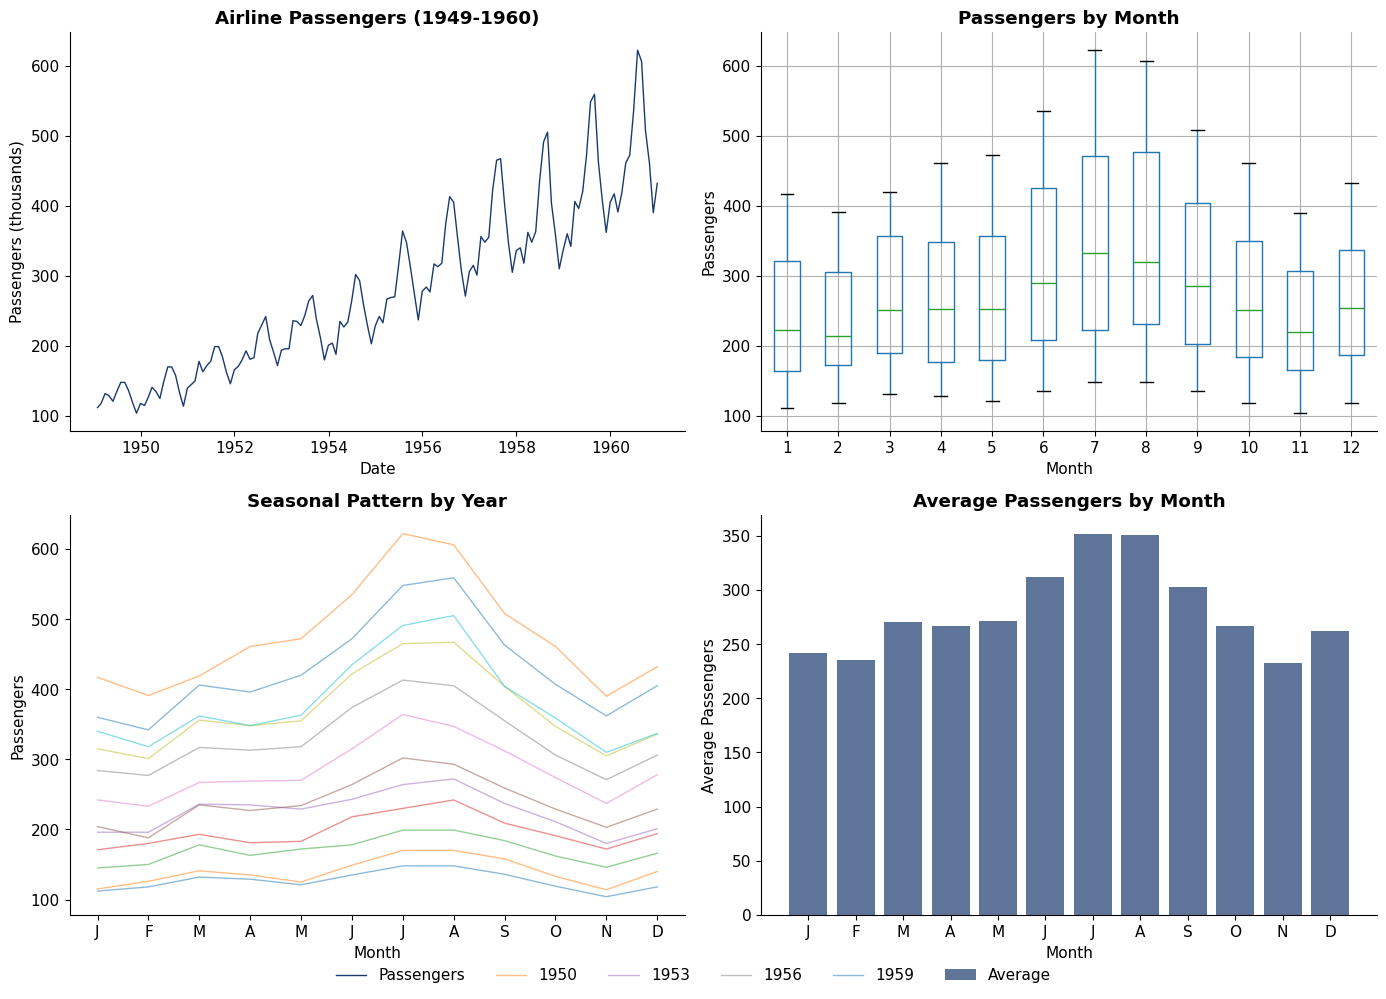

In [23]:
# Visualization
fig, axes = plt.subplots(2, 2, figsize=(14, 10))

# Time series plot
axes[0, 0].plot(airline.index, airline['Passengers'], color=COLORS['blue'], linewidth=1, label='Passengers')
axes[0, 0].set_title('Airline Passengers (1949-1960)', fontweight='bold')
axes[0, 0].set_xlabel('Date')
axes[0, 0].set_ylabel('Passengers (thousands)')

# Monthly boxplot
monthly_data = airline.copy()
monthly_data['Month'] = monthly_data.index.month
monthly_data.boxplot(column='Passengers', by='Month', ax=axes[0, 1])
axes[0, 1].set_title('Passengers by Month', fontweight='bold')
axes[0, 1].set_xlabel('Month')
axes[0, 1].set_ylabel('Passengers')
plt.suptitle('')  # Remove automatic title

# Yearly plot (multiple years overlaid)
for year in airline.index.year.unique():
    yearly_data = airline[airline.index.year == year]
    axes[1, 0].plot(range(1, 13), yearly_data['Passengers'].values, 
                    alpha=0.5, linewidth=1, label=str(year) if year % 3 == 0 else '')
axes[1, 0].set_title('Seasonal Pattern by Year', fontweight='bold')
axes[1, 0].set_xlabel('Month')
axes[1, 0].set_ylabel('Passengers')
axes[1, 0].set_xticks(range(1, 13))
axes[1, 0].set_xticklabels(['J', 'F', 'M', 'A', 'M', 'J', 'J', 'A', 'S', 'O', 'N', 'D'])

# Average by month
monthly_avg = airline.groupby(airline.index.month).mean()
axes[1, 1].bar(range(1, 13), monthly_avg['Passengers'].values, 
               color=COLORS['blue'], alpha=0.7, label='Average')
axes[1, 1].set_title('Average Passengers by Month', fontweight='bold')
axes[1, 1].set_xlabel('Month')
axes[1, 1].set_ylabel('Average Passengers')
axes[1, 1].set_xticks(range(1, 13))
axes[1, 1].set_xticklabels(['J', 'F', 'M', 'A', 'M', 'J', 'J', 'A', 'S', 'O', 'N', 'D'])

# Collect handles and labels from axes with legends
handles, labels = [], []
for ax_row in axes:
    for ax in ax_row:
        h, l = ax.get_legend_handles_labels()
        handles.extend(h)
        labels.extend(l)

fig.legend(handles, labels, loc='lower center', ncol=6, bbox_to_anchor=(0.5, -0.02))
plt.subplots_adjust(bottom=0.08)
plt.tight_layout()
plt.show()

In [24]:
print("\nKey observations:")
print(f"- Peak month: {monthly_avg['Passengers'].idxmax()} (summer travel)")
print(f"- Trough month: {monthly_avg['Passengers'].idxmin()} (winter)")
print(f"- Seasonal amplitude grows over time (multiplicative seasonality)")


Key observations:
- Peak month: 7 (summer travel)
- Trough month: 11 (winter)
- Seasonal amplitude grows over time (multiplicative seasonality)


### Exercise 1 Questions

1. What is the seasonal period for this data?
2. Is the seasonality additive or multiplicative? How can you tell?
3. Why might summer months have higher passenger counts?

## Exercise 2: Seasonal Decomposition

### Task
Decompose the airline passengers series into trend, seasonal, and residual components.

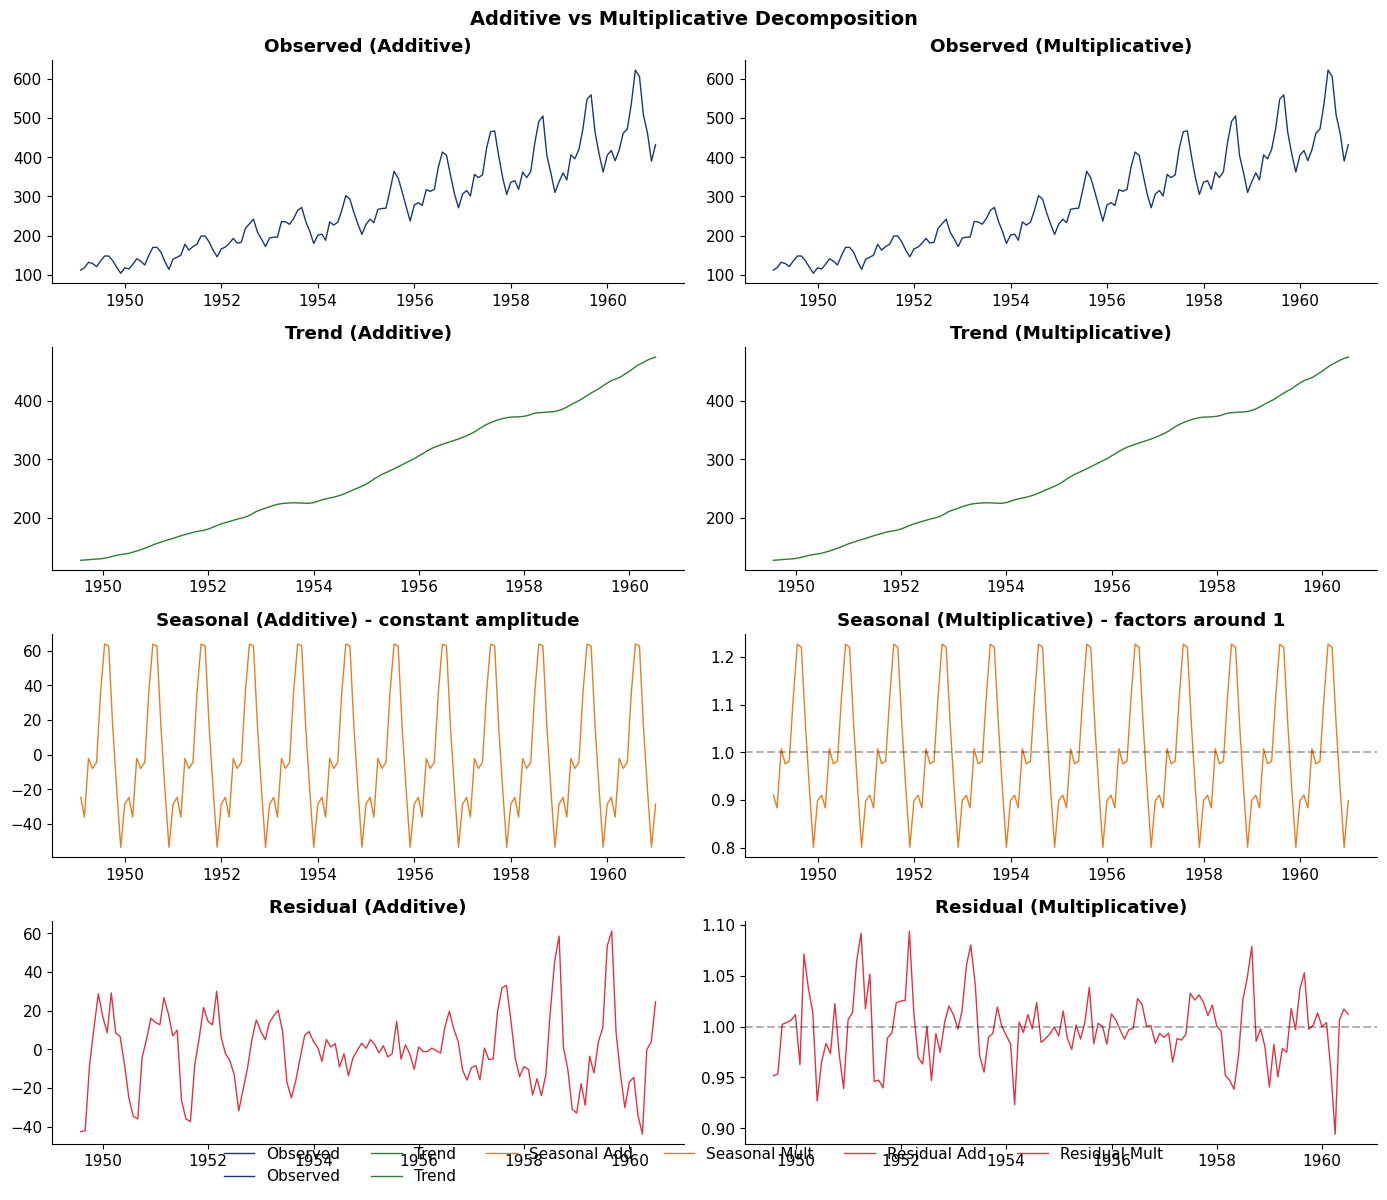


Residual Variance Comparison:
  Additive: 371.22
  Multiplicative: 0.001106

Multiplicative model is better (lower, more stable residuals)


In [25]:
# Compare additive vs multiplicative decomposition
decomp_add = seasonal_decompose(airline['Passengers'], model='additive', period=12)
decomp_mult = seasonal_decompose(airline['Passengers'], model='multiplicative', period=12)

fig, axes = plt.subplots(4, 2, figsize=(14, 12))
fig.suptitle('Additive vs Multiplicative Decomposition', fontsize=14, fontweight='bold')

# Additive (left column)
axes[0, 0].plot(decomp_add.observed, color=COLORS['blue'], linewidth=1, label='Observed')
axes[0, 0].set_title('Observed (Additive)', fontweight='bold')

axes[1, 0].plot(decomp_add.trend, color=COLORS['green'], linewidth=1, label='Trend')
axes[1, 0].set_title('Trend (Additive)', fontweight='bold')

axes[2, 0].plot(decomp_add.seasonal, color=COLORS['orange'], linewidth=1, label='Seasonal Add')
axes[2, 0].set_title('Seasonal (Additive) - constant amplitude', fontweight='bold')

axes[3, 0].plot(decomp_add.resid, color=COLORS['red'], linewidth=1, label='Residual Add')
axes[3, 0].set_title('Residual (Additive)', fontweight='bold')

# Multiplicative (right column)
axes[0, 1].plot(decomp_mult.observed, color=COLORS['blue'], linewidth=1, label='Observed')
axes[0, 1].set_title('Observed (Multiplicative)', fontweight='bold')

axes[1, 1].plot(decomp_mult.trend, color=COLORS['green'], linewidth=1, label='Trend')
axes[1, 1].set_title('Trend (Multiplicative)', fontweight='bold')

axes[2, 1].plot(decomp_mult.seasonal, color=COLORS['orange'], linewidth=1, label='Seasonal Mult')
axes[2, 1].axhline(y=1, color='black', linestyle='--', alpha=0.3)
axes[2, 1].set_title('Seasonal (Multiplicative) - factors around 1', fontweight='bold')

axes[3, 1].plot(decomp_mult.resid, color=COLORS['red'], linewidth=1, label='Residual Mult')
axes[3, 1].axhline(y=1, color='black', linestyle='--', alpha=0.3)
axes[3, 1].set_title('Residual (Multiplicative)', fontweight='bold')

# Collect handles and labels from all axes
handles, labels = [], []
for ax_row in axes:
    for ax in ax_row:
        h, l = ax.get_legend_handles_labels()
        handles.extend(h)
        labels.extend(l)

fig.legend(handles, labels, loc='lower center', ncol=6, bbox_to_anchor=(0.5, -0.01))
plt.subplots_adjust(bottom=0.06)
plt.tight_layout()
plt.show()

# Compare residual variance
add_resid_var = np.nanvar(decomp_add.resid)
mult_resid_var = np.nanvar(decomp_mult.resid)

print(f"\nResidual Variance Comparison:")
print(f"  Additive: {add_resid_var:.2f}")
print(f"  Multiplicative: {mult_resid_var:.6f}")
print(f"\nMultiplicative model is better (lower, more stable residuals)")

In [26]:
# Extract and display seasonal factors
seasonal_factors = decomp_mult.seasonal.iloc[:12]

print("Monthly Seasonal Factors (Multiplicative):")
print("="*50)
months = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 
          'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']
for month, factor in zip(months, seasonal_factors):
    pct_change = (factor - 1) * 100
    direction = "↑" if pct_change > 0 else "↓"
    print(f"  {month}: {factor:.3f} ({pct_change:+.1f}% {direction})")

Monthly Seasonal Factors (Multiplicative):
  Jan: 0.910 (-9.0% ↓)
  Feb: 0.884 (-11.6% ↓)
  Mar: 1.007 (+0.7% ↑)
  Apr: 0.976 (-2.4% ↓)
  May: 0.981 (-1.9% ↓)
  Jun: 1.113 (+11.3% ↑)
  Jul: 1.227 (+22.7% ↑)
  Aug: 1.220 (+22.0% ↑)
  Sep: 1.060 (+6.0% ↑)
  Oct: 0.922 (-7.8% ↓)
  Nov: 0.801 (-19.9% ↓)
  Dec: 0.899 (-10.1% ↓)


## Exercise 3: Seasonal Differencing

### Task
Apply different differencing operators and test for stationarity.

In [27]:
# Apply log transformation and differencing
y = airline['Passengers'].values
log_y = np.log(y)

# Different differencing operations
diff1 = np.diff(log_y)                    # (1-L)
diff12 = log_y[12:] - log_y[:-12]         # (1-L^12)
diff1_12 = np.diff(diff12)                # (1-L)(1-L^12)

print("Number of observations after each transformation:")
print(f"  Original: {len(log_y)}")
print(f"  After (1-L): {len(diff1)}")
print(f"  After (1-L^12): {len(diff12)}")
print(f"  After (1-L)(1-L^12): {len(diff1_12)}")

Number of observations after each transformation:
  Original: 144
  After (1-L): 143
  After (1-L^12): 132
  After (1-L)(1-L^12): 131


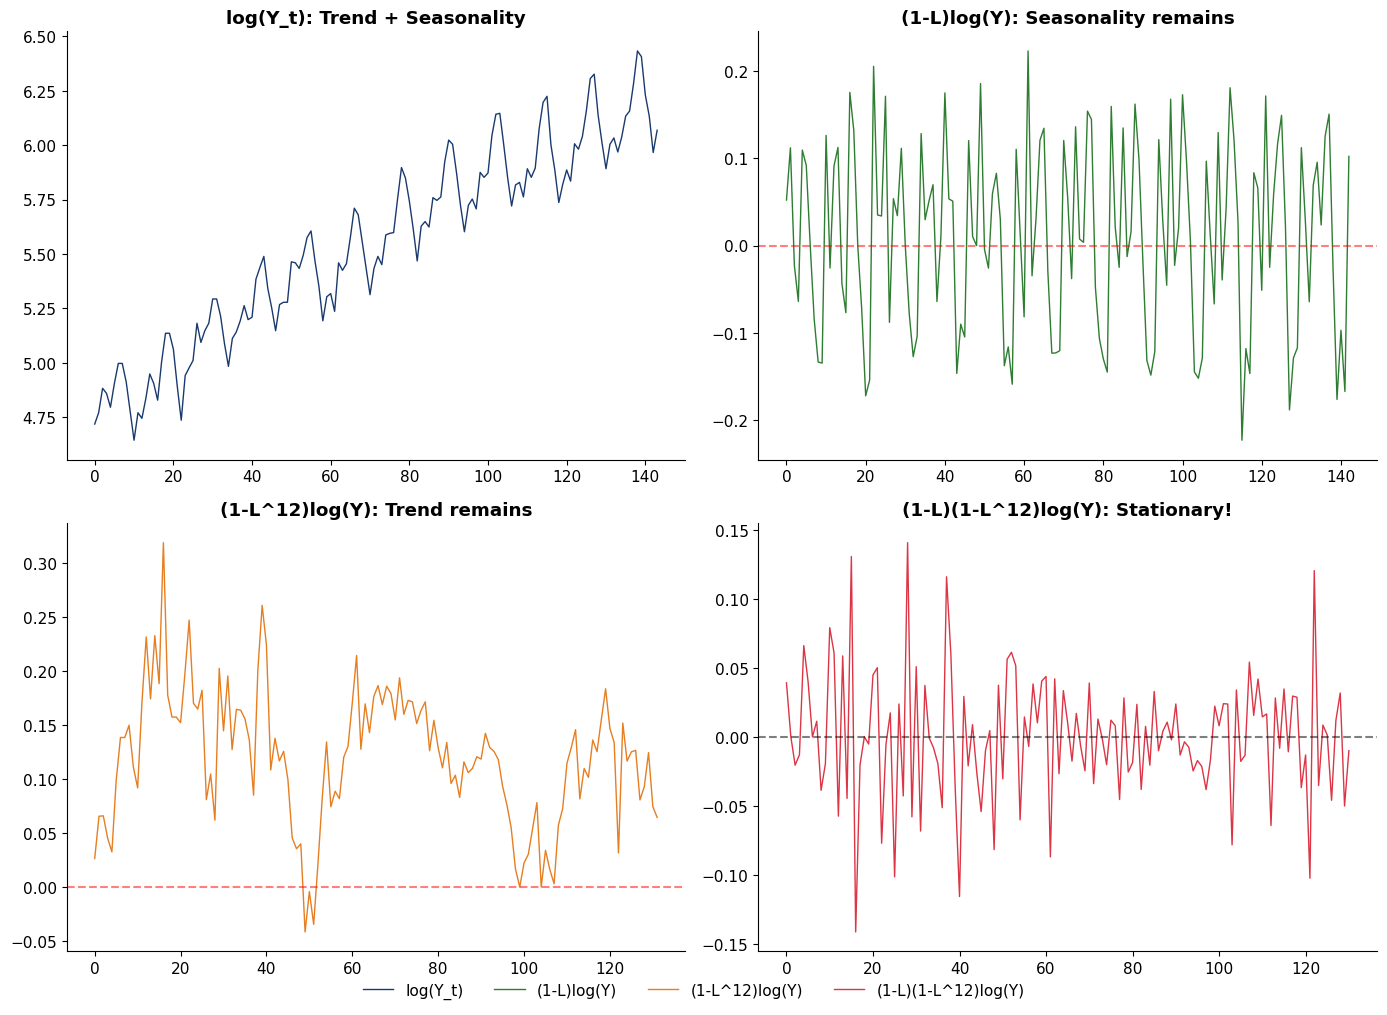

In [28]:
# Visualize each transformation
fig, axes = plt.subplots(2, 2, figsize=(14, 10))

# Original log series
axes[0, 0].plot(log_y, color=COLORS['blue'], linewidth=1, label='log(Y_t)')
axes[0, 0].set_title('log(Y_t): Trend + Seasonality', fontweight='bold')

# First difference only
axes[0, 1].plot(diff1, color=COLORS['green'], linewidth=1, label='(1-L)log(Y)')
axes[0, 1].axhline(y=0, color='red', linestyle='--', alpha=0.5)
axes[0, 1].set_title('(1-L)log(Y): Seasonality remains', fontweight='bold')

# Seasonal difference only
axes[1, 0].plot(diff12, color=COLORS['orange'], linewidth=1, label='(1-L^12)log(Y)')
axes[1, 0].axhline(y=0, color='red', linestyle='--', alpha=0.5)
axes[1, 0].set_title('(1-L^12)log(Y): Trend remains', fontweight='bold')

# Both differences
axes[1, 1].plot(diff1_12, color=COLORS['red'], linewidth=1, label='(1-L)(1-L^12)log(Y)')
axes[1, 1].axhline(y=0, color='black', linestyle='--', alpha=0.5)
axes[1, 1].set_title('(1-L)(1-L^12)log(Y): Stationary!', fontweight='bold')

# Collect handles and labels from all axes
handles, labels = [], []
for ax_row in axes:
    for ax in ax_row:
        h, l = ax.get_legend_handles_labels()
        handles.extend(h)
        labels.extend(l)

fig.legend(handles, labels, loc='lower center', ncol=4, bbox_to_anchor=(0.5, -0.02))
plt.subplots_adjust(bottom=0.1)
plt.tight_layout()
plt.show()

In [29]:
# Unit root tests on each transformation
def adf_summary(series, name):
    result = adfuller(series, autolag='AIC')
    status = "STATIONARY" if result[1] < 0.05 else "NON-STATIONARY"
    print(f"{name:<30} ADF={result[0]:>8.3f}  p={result[1]:.4f}  → {status}")

print("ADF Test Results:")
print("="*75)
adf_summary(log_y, "log(Y)")
adf_summary(diff1, "(1-L)log(Y)")
adf_summary(diff12, "(1-L^12)log(Y)")
adf_summary(diff1_12, "(1-L)(1-L^12)log(Y)")
print("="*75)
print("\nConclusion: Need BOTH d=1 AND D=1 for stationarity")

ADF Test Results:
log(Y)                         ADF=  -1.717  p=0.4224  → NON-STATIONARY
(1-L)log(Y)                    ADF=  -2.717  p=0.0711  → NON-STATIONARY
(1-L^12)log(Y)                 ADF=  -2.710  p=0.0724  → NON-STATIONARY


(1-L)(1-L^12)log(Y)            ADF=  -4.443  p=0.0002  → STATIONARY

Conclusion: Need BOTH d=1 AND D=1 for stationarity


## Exercise 4: ACF/PACF for Seasonal Model Identification

### Task
Analyze ACF and PACF patterns to identify SARIMA orders.

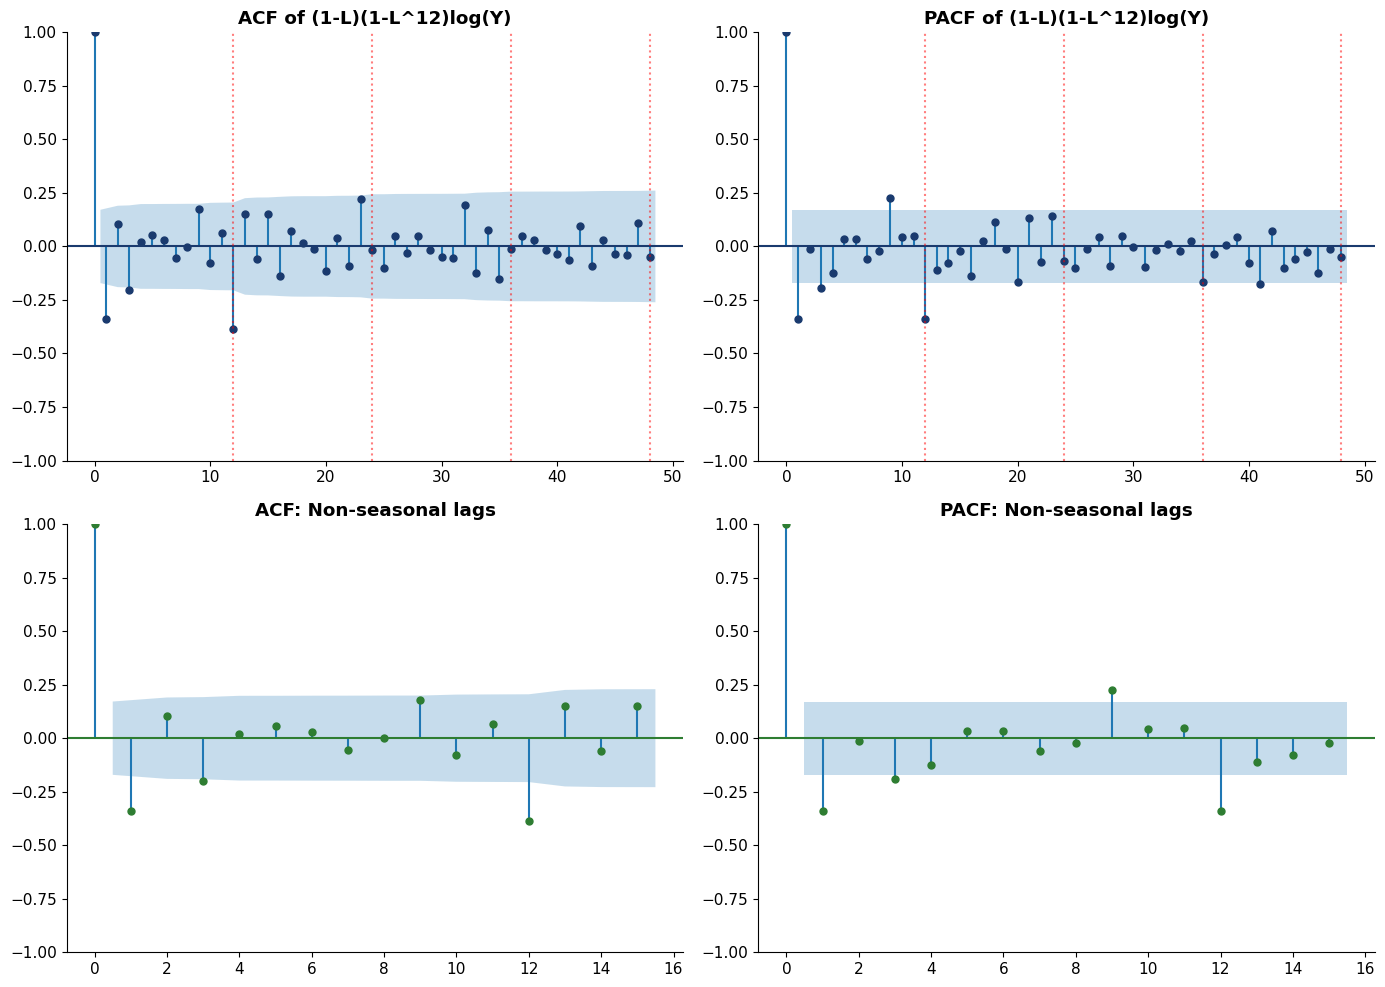


ACF/PACF Analysis:
- Significant spike at lag 1 in ACF → q=1 (MA component)
- Significant spike at lag 12 in ACF → Q=1 (Seasonal MA)
- Suggested model: SARIMA(0,1,1)(0,1,1)[12] - the airline model


In [30]:
# ACF and PACF of the fully differenced series
fig, axes = plt.subplots(2, 2, figsize=(14, 10))

# Full ACF
plot_acf(diff1_12, ax=axes[0, 0], lags=48, color=COLORS['blue'])
axes[0, 0].set_title('ACF of (1-L)(1-L^12)log(Y)', fontweight='bold')
for lag in [12, 24, 36, 48]:
    axes[0, 0].axvline(x=lag, color='red', linestyle=':', alpha=0.5)

# Full PACF
plot_pacf(diff1_12, ax=axes[0, 1], lags=48, color=COLORS['blue'])
axes[0, 1].set_title('PACF of (1-L)(1-L^12)log(Y)', fontweight='bold')
for lag in [12, 24, 36, 48]:
    axes[0, 1].axvline(x=lag, color='red', linestyle=':', alpha=0.5)

# Non-seasonal lags only (1-15)
plot_acf(diff1_12, ax=axes[1, 0], lags=15, color=COLORS['green'])
axes[1, 0].set_title('ACF: Non-seasonal lags', fontweight='bold')

plot_pacf(diff1_12, ax=axes[1, 1], lags=15, color=COLORS['green'])
axes[1, 1].set_title('PACF: Non-seasonal lags', fontweight='bold')

plt.subplots_adjust(bottom=0.08)
plt.tight_layout()
plt.show()

print("\nACF/PACF Analysis:")
print("- Significant spike at lag 1 in ACF → q=1 (MA component)")
print("- Significant spike at lag 12 in ACF → Q=1 (Seasonal MA)")
print("- Suggested model: SARIMA(0,1,1)(0,1,1)[12] - the airline model")

## Exercise 5: Fitting SARIMA Models

### Task
Fit and compare different SARIMA specifications.

In [31]:
# Compare different SARIMA models
print("SARIMA Model Comparison:")
print("="*70)
print(f"{'Model':<35} {'AIC':>12} {'BIC':>12}")
print("-"*70)

models_to_try = [
    ((0, 1, 1), (0, 1, 1, 12)),  # Airline model
    ((1, 1, 0), (1, 1, 0, 12)),  # Pure AR
    ((1, 1, 1), (0, 1, 1, 12)),  # Mixed non-seasonal
    ((0, 1, 1), (1, 1, 0, 12)),  # Mixed seasonal
    ((1, 1, 1), (1, 1, 1, 12)),  # Full model
    ((2, 1, 0), (0, 1, 1, 12)),  # AR(2) + seasonal MA
]

results_dict = {}
for order, seasonal_order in models_to_try:
    try:
        model = SARIMAX(log_y, order=order, seasonal_order=seasonal_order,
                        enforce_stationarity=False, enforce_invertibility=False)
        res = model.fit(disp=False)
        name = f"SARIMA{order}x{seasonal_order[:3]}[{seasonal_order[3]}]"
        results_dict[name] = res
        print(f"{name:<35} {res.aic:>12.2f} {res.bic:>12.2f}")
    except Exception as e:
        pass

# Find best model
best_model_name = min(results_dict.keys(), key=lambda x: results_dict[x].aic)
print("-"*70)
print(f"Best model by AIC: {best_model_name}")

SARIMA Model Comparison:
Model                                        AIC          BIC
----------------------------------------------------------------------
SARIMA(0, 1, 1)x(0, 1, 1)[12]            -435.44      -427.16


SARIMA(1, 1, 0)x(1, 1, 0)[12]            -431.33      -423.02


SARIMA(1, 1, 1)x(0, 1, 1)[12]            -433.79      -422.74
SARIMA(0, 1, 1)x(1, 1, 0)[12]            -437.12      -428.78


SARIMA(1, 1, 1)x(1, 1, 1)[12]            -427.03      -413.22
SARIMA(2, 1, 0)x(0, 1, 1)[12]            -435.65      -424.57
----------------------------------------------------------------------
Best model by AIC: SARIMA(0, 1, 1)x(1, 1, 0)[12]


In [32]:
# Fit the airline model and show detailed results
airline_model = SARIMAX(log_y, order=(0, 1, 1), seasonal_order=(0, 1, 1, 12),
                        enforce_stationarity=False, enforce_invertibility=False)
airline_results = airline_model.fit(disp=False)

print("Airline Model: SARIMA(0,1,1)(0,1,1)[12]")
print("="*60)
print(airline_results.summary())

Airline Model: SARIMA(0,1,1)(0,1,1)[12]
                                     SARIMAX Results                                      
Dep. Variable:                                  y   No. Observations:                  144
Model:             SARIMAX(0, 1, 1)x(0, 1, 1, 12)   Log Likelihood                 220.722
Date:                            Sun, 18 Jan 2026   AIC                           -435.444
Time:                                    17:07:56   BIC                           -427.157
Sample:                                         0   HQIC                          -432.079
                                            - 144                                         
Covariance Type:                              opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ma.L1         -0.4327      0.075     -5.750      0.000      -0.580      -0

In [33]:
# Use auto_arima for automatic selection
print("\nAutomatic Model Selection:")
print("="*60)

auto_model = pm.auto_arima(
    log_y,
    start_p=0, start_q=0, max_p=2, max_q=2,
    d=1,
    start_P=0, start_Q=0, max_P=2, max_Q=2,
    D=1, m=12,
    seasonal=True,
    stepwise=True,
    suppress_warnings=True,
    trace=True
)

print(f"\nAuto-selected: SARIMA{auto_model.order}x{auto_model.seasonal_order[:3]}[{auto_model.seasonal_order[3]}]")


Automatic Model Selection:
Performing stepwise search to minimize aic
 ARIMA(0,1,0)(0,1,0)[12]             : AIC=-434.830, Time=0.01 sec
 ARIMA(1,1,0)(1,1,0)[12]             : AIC=-474.813, Time=0.09 sec


 ARIMA(0,1,1)(0,1,1)[12]             : AIC=-483.393, Time=0.32 sec
 ARIMA(0,1,1)(0,1,0)[12]             : AIC=-449.978, Time=0.03 sec


 ARIMA(0,1,1)(1,1,1)[12]             : AIC=-481.906, Time=0.48 sec


 ARIMA(0,1,1)(0,1,2)[12]             : AIC=-481.956, Time=1.58 sec
 ARIMA(0,1,1)(1,1,0)[12]             : AIC=-477.399, Time=0.12 sec


 ARIMA(0,1,1)(1,1,2)[12]             : AIC=-479.902, Time=0.81 sec
 ARIMA(0,1,0)(0,1,1)[12]             : AIC=-467.553, Time=0.12 sec


 ARIMA(1,1,1)(0,1,1)[12]             : AIC=-481.893, Time=0.48 sec


 ARIMA(0,1,2)(0,1,1)[12]             : AIC=-481.610, Time=0.23 sec
 ARIMA(1,1,0)(0,1,1)[12]             : AIC=-481.484, Time=0.14 sec


 ARIMA(1,1,2)(0,1,1)[12]             : AIC=-479.399, Time=0.30 sec


 ARIMA(0,1,1)(0,1,1)[12] intercept   : AIC=-481.421, Time=0.56 sec

Best model:  ARIMA(0,1,1)(0,1,1)[12]          
Total fit time: 5.285 seconds

Auto-selected: SARIMA(0, 1, 1)x(0, 1, 1)[12]


## Exercise 6: Model Diagnostics

### Task
Validate the fitted model using residual analysis.

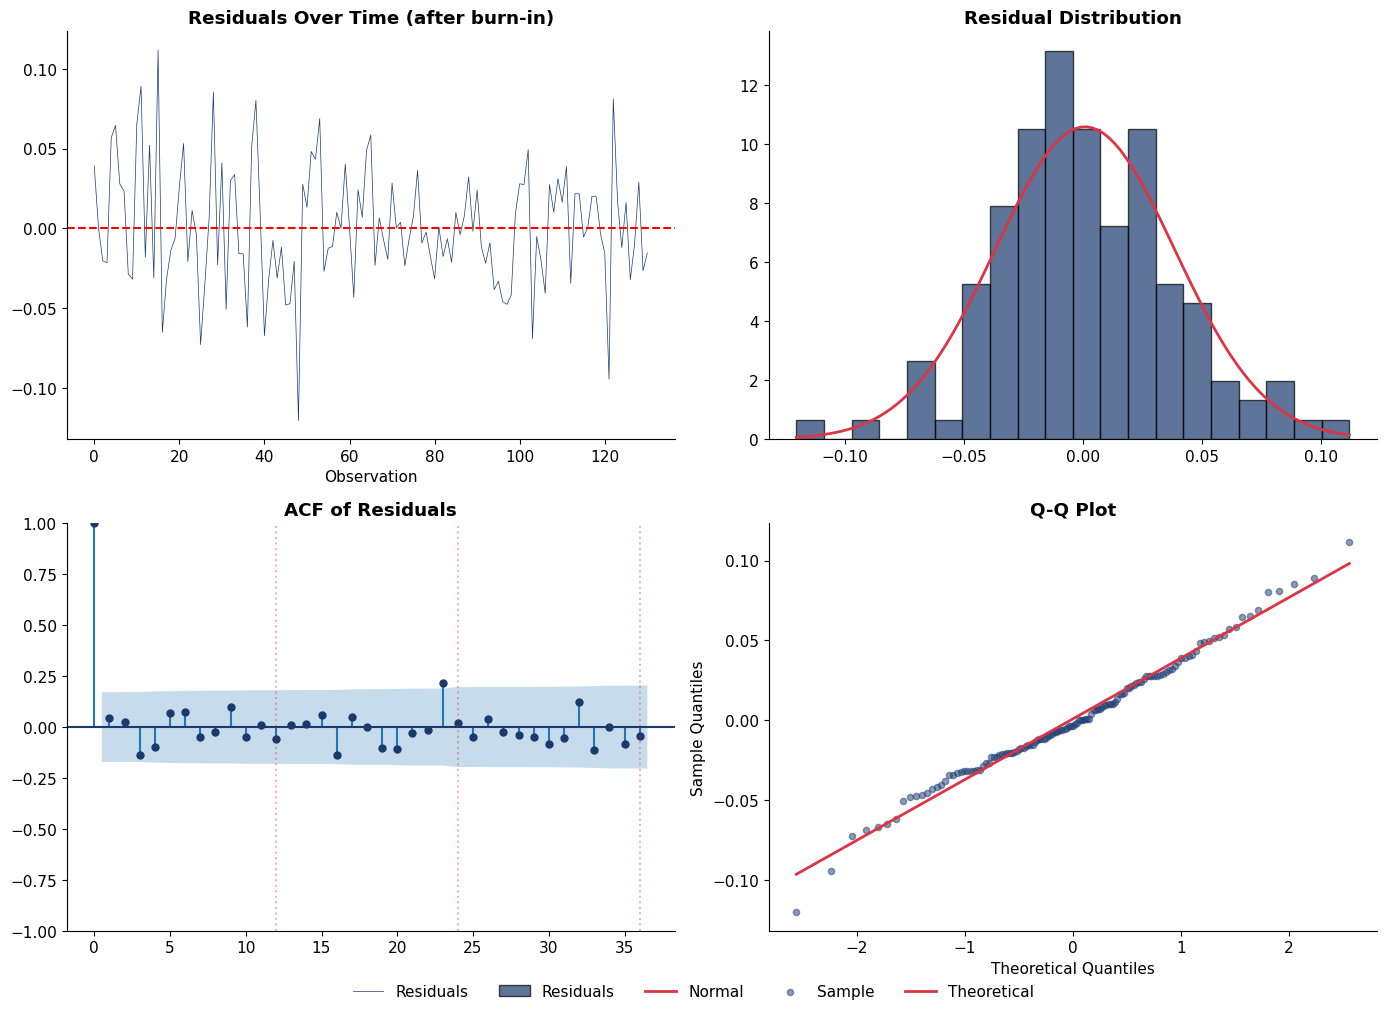

In [34]:
# Diagnostic plots
# Skip first 13 residuals (burn-in period for seasonal model s=12)
residuals_full = airline_results.resid
residuals = np.array(residuals_full[13:])  # Convert to numpy array, skip burn-in

fig, axes = plt.subplots(2, 2, figsize=(14, 10))

# Residuals over time
axes[0, 0].plot(range(len(residuals)), residuals, color=COLORS['blue'], linewidth=0.5, label='Residuals')
axes[0, 0].axhline(y=0, color='red', linestyle='--')
axes[0, 0].set_title('Residuals Over Time (after burn-in)', fontweight='bold')
axes[0, 0].set_xlabel('Observation')

# Histogram
axes[0, 1].hist(residuals, bins=20, color=COLORS['blue'], edgecolor='black', 
                alpha=0.7, density=True, label='Residuals')
x = np.linspace(residuals.min(), residuals.max(), 100)
axes[0, 1].plot(x, stats.norm.pdf(x, residuals.mean(), residuals.std()), 
                color=COLORS['red'], linewidth=2, label='Normal')
axes[0, 1].set_title('Residual Distribution', fontweight='bold')

# ACF of residuals
plot_acf(residuals, ax=axes[1, 0], lags=36, color=COLORS['blue'])
axes[1, 0].set_title('ACF of Residuals', fontweight='bold')
for lag in [12, 24, 36]:
    axes[1, 0].axvline(x=lag, color='red', linestyle=':', alpha=0.3)

# Q-Q plot
(osm, osr), (slope, intercept, r) = stats.probplot(residuals, dist="norm")
axes[1, 1].scatter(osm, osr, color=COLORS['blue'], s=20, alpha=0.5, label='Sample')
axes[1, 1].plot(osm, slope*osm + intercept, color=COLORS['red'], linewidth=2, label='Theoretical')
axes[1, 1].set_title('Q-Q Plot', fontweight='bold')
axes[1, 1].set_xlabel('Theoretical Quantiles')
axes[1, 1].set_ylabel('Sample Quantiles')

# Collect handles and labels from all axes
handles, labels = [], []
for ax_row in axes:
    for ax in ax_row:
        h, l = ax.get_legend_handles_labels()
        handles.extend(h)
        labels.extend(l)

fig.legend(handles, labels, loc='lower center', ncol=5, bbox_to_anchor=(0.5, -0.02))
plt.subplots_adjust(bottom=0.08)
plt.tight_layout()
plt.show()

In [35]:
print(f"\nNote: First 13 residuals skipped (model burn-in period)")


Note: First 13 residuals skipped (model burn-in period)


In [36]:
# Ljung-Box test
lb_test = acorr_ljungbox(residuals, lags=[12, 24, 36], return_df=True)
print("Ljung-Box Test for Residual Autocorrelation:")
print("="*50)
print(lb_test)

all_pass = all(lb_test['lb_pvalue'] > 0.05)
print(f"\nConclusion: {'Residuals are white noise ✓' if all_pass else 'Model may be inadequate ✗'}")

Ljung-Box Test for Residual Autocorrelation:
      lb_stat  lb_pvalue
12   8.383947   0.754453
24  23.462509   0.492651
36  33.056932   0.609324

Conclusion: Residuals are white noise ✓


## Exercise 7: Forecasting

### Task
Generate and evaluate forecasts for the airline passengers data.

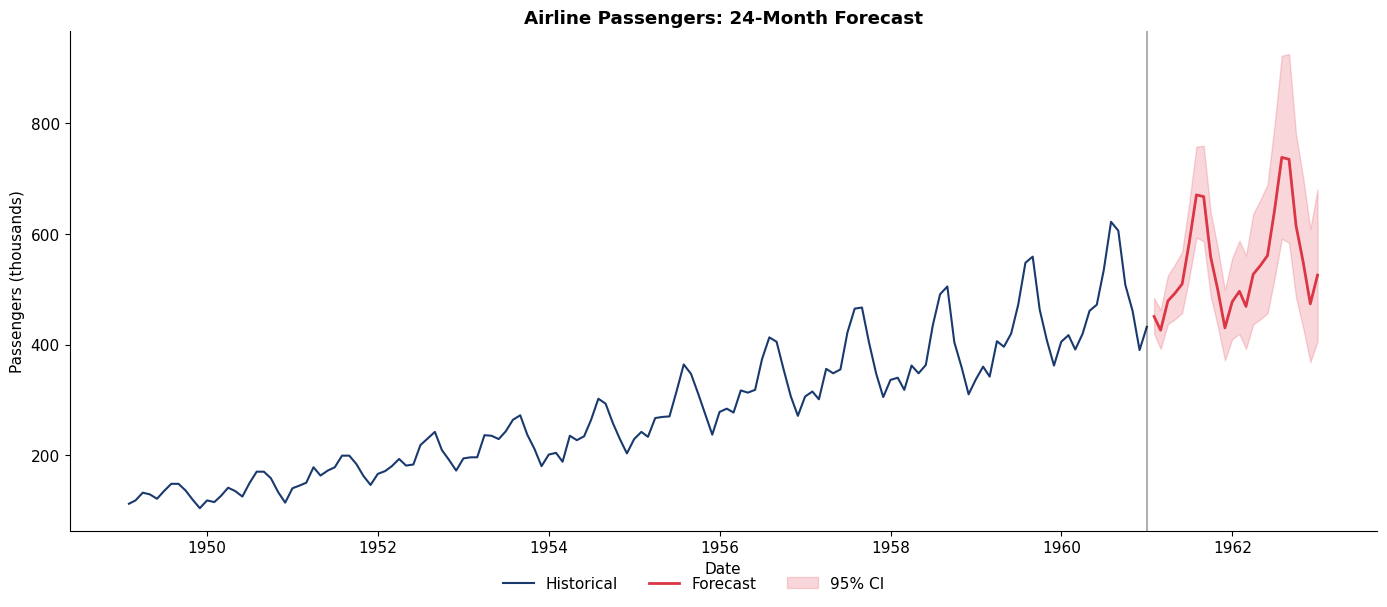

In [37]:
# Generate forecasts
forecast_steps = 24  # 2 years
forecast = airline_results.get_forecast(steps=forecast_steps)
forecast_mean = forecast.predicted_mean
forecast_ci = forecast.conf_int()

# Convert from log scale
passengers_forecast = np.exp(forecast_mean)
# Handle both DataFrame and numpy array cases
if hasattr(forecast_ci, "iloc"):
    ci_lower = np.exp(forecast_ci.iloc[:, 0])
    ci_upper = np.exp(forecast_ci.iloc[:, 1])
else:
    ci_lower = np.exp(forecast_ci[:, 0])
    ci_upper = np.exp(forecast_ci[:, 1])

# Create forecast dates
forecast_dates = pd.date_range(start=airline.index[-1] + pd.DateOffset(months=1), 
                               periods=forecast_steps, freq='ME')

# Plot
fig, ax = plt.subplots(figsize=(14, 6))

ax.plot(airline.index, airline['Passengers'], color=COLORS['blue'], linewidth=1.5, label='Historical')
ax.plot(forecast_dates, passengers_forecast, color=COLORS['red'], linewidth=2, label='Forecast')
ax.fill_between(forecast_dates, ci_lower, ci_upper, color=COLORS['red'], alpha=0.2, label='95% CI')

ax.axvline(x=airline.index[-1], color='black', linestyle='-', alpha=0.3)
ax.set_title('Airline Passengers: 24-Month Forecast', fontweight='bold')
ax.set_xlabel('Date')
ax.set_ylabel('Passengers (thousands)')

handles, labels = ax.get_legend_handles_labels()
fig.legend(handles, labels, loc='lower center', ncol=3, bbox_to_anchor=(0.5, -0.02))
plt.subplots_adjust(bottom=0.15)
plt.tight_layout()
plt.show()

In [38]:
# Show forecast table
print("\nForecast Summary (next 12 months):")
print("="*60)
print(f"{'Date':<15} {'Forecast':>12} {'Lower 95%':>12} {'Upper 95%':>12}")
print("-"*60)
for i in range(12):
    print(f"{str(forecast_dates[i].date()):<15} {passengers_forecast[i]:>12.0f} "
          f"{ci_lower[i]:>12.0f} {ci_upper[i]:>12.0f}")


Forecast Summary (next 12 months):
Date                Forecast    Lower 95%    Upper 95%
------------------------------------------------------------
1961-01-31               451          420          484
1961-02-28               426          392          462
1961-03-31               479          437          525
1961-04-30               493          446          545
1961-05-31               510          457          568
1961-06-30               584          520          655
1961-07-31               671          593          758
1961-08-31               668          587          760
1961-09-30               558          488          639
1961-10-31               498          432          573
1961-11-30               430          371          498
1961-12-31               477          410          556


## Exercise 8: Real Data - US Retail Sales

### Task
Apply SARIMA to real US retail sales data with seasonality.

Simulated Retail Sales: 180 observations


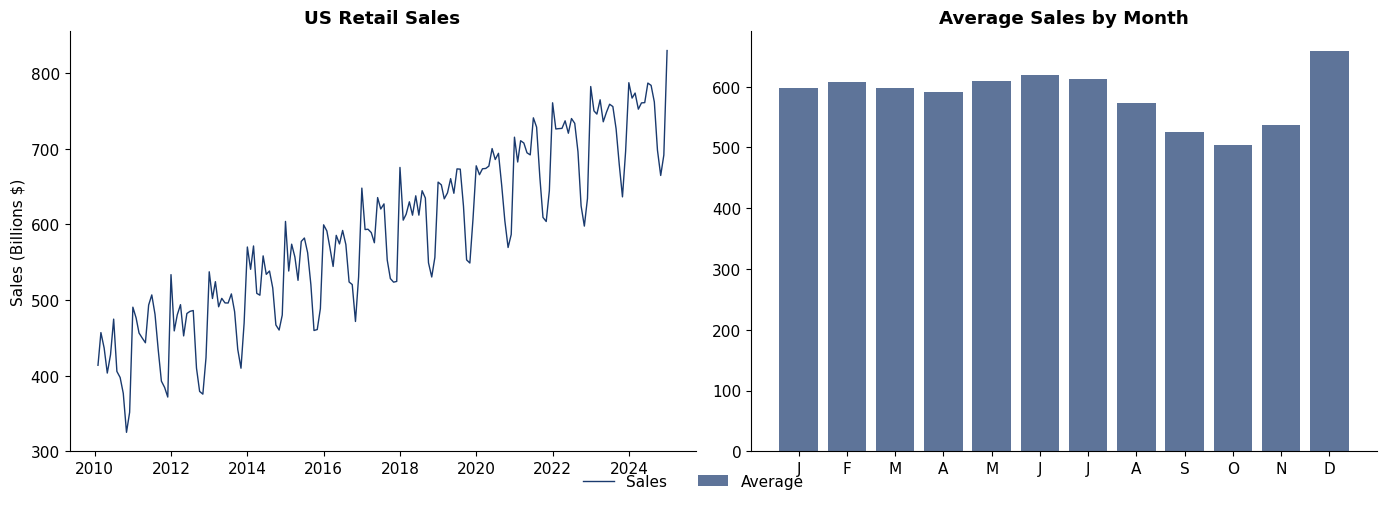

In [39]:
# Load retail sales data from FRED
try:
    import pandas_datareader as pdr
    retail = pdr.get_data_fred('RSXFSN', start='2010-01-01', end='2024-12-31')
    retail = retail.dropna()
    retail.columns = ['Sales']
    print(f"US Retail Sales: {len(retail)} monthly observations")
except:
    # Generate synthetic retail-like data
    np.random.seed(123)
    n = 180  # 15 years monthly
    t = np.arange(n)
    trend = 400 + 2 * t
    seasonal = 50 * np.sin(2 * np.pi * t / 12) + 30 * np.cos(4 * np.pi * t / 12)
    # December spike
    december = np.zeros(n)
    december[11::12] = 80
    noise = np.random.randn(n) * 15
    sales = trend + seasonal + december + noise
    retail = pd.DataFrame({'Sales': sales},
                         index=pd.date_range('2010-01', periods=n, freq='ME'))
    print(f"Simulated Retail Sales: {len(retail)} observations")

# Plot
fig, axes = plt.subplots(1, 2, figsize=(14, 5))

axes[0].plot(retail.index, retail['Sales'], color=COLORS['blue'], linewidth=1, label='Sales')
axes[0].set_title('US Retail Sales', fontweight='bold')
axes[0].set_ylabel('Sales (Billions $)')

# Monthly pattern
monthly_avg = retail.groupby(retail.index.month).mean()
axes[1].bar(range(1, 13), monthly_avg['Sales'].values, color=COLORS['blue'], alpha=0.7, label='Average')
axes[1].set_title('Average Sales by Month', fontweight='bold')
axes[1].set_xticks(range(1, 13))
axes[1].set_xticklabels(['J', 'F', 'M', 'A', 'M', 'J', 'J', 'A', 'S', 'O', 'N', 'D'])

# Collect handles and labels from all axes
handles, labels = [], []
for ax in axes:
    h, l = ax.get_legend_handles_labels()
    handles.extend(h)
    labels.extend(l)

fig.legend(handles, labels, loc='lower center', ncol=2, bbox_to_anchor=(0.5, -0.02))
plt.subplots_adjust(bottom=0.15)
plt.tight_layout()
plt.show()

In [40]:
# Split data and fit SARIMA
retail_values = retail['Sales'].values
train_end = len(retail_values) - 24  # Hold out last 2 years

train = retail_values[:train_end]
test = retail_values[train_end:]

# Log transform
log_train = np.log(train)
log_test = np.log(test)

print(f"Training: {len(train)} obs, Test: {len(test)} obs")

# Auto SARIMA
retail_auto = pm.auto_arima(
    log_train,
    start_p=0, start_q=0, max_p=2, max_q=2,
    d=1,
    start_P=0, start_Q=0, max_P=1, max_Q=1,
    D=1, m=12,
    seasonal=True,
    stepwise=True,
    suppress_warnings=True,
    trace=True
)

print(f"\nSelected: SARIMA{retail_auto.order}x{retail_auto.seasonal_order[:3]}[{retail_auto.seasonal_order[3]}]")

Training: 156 obs, Test: 24 obs
Performing stepwise search to minimize aic
 ARIMA(0,1,0)(0,1,0)[12]             : AIC=-387.039, Time=0.01 sec
 ARIMA(1,1,0)(1,1,0)[12]             : AIC=-452.133, Time=0.06 sec


 ARIMA(0,1,1)(0,1,1)[12]             : AIC=-515.010, Time=0.24 sec
 ARIMA(0,1,1)(0,1,0)[12]             : AIC=-466.583, Time=0.04 sec


 ARIMA(0,1,1)(1,1,1)[12]             : AIC=-513.541, Time=0.24 sec


 ARIMA(0,1,1)(1,1,0)[12]             : AIC=-495.171, Time=0.28 sec
 ARIMA(0,1,0)(0,1,1)[12]             : AIC=-438.994, Time=0.18 sec


 ARIMA(1,1,1)(0,1,1)[12]             : AIC=-513.149, Time=0.41 sec


 ARIMA(0,1,2)(0,1,1)[12]             : AIC=-513.157, Time=0.47 sec


 ARIMA(1,1,0)(0,1,1)[12]             : AIC=-471.783, Time=0.64 sec


 ARIMA(1,1,2)(0,1,1)[12]             : AIC=-513.532, Time=0.39 sec


 ARIMA(0,1,1)(0,1,1)[12] intercept   : AIC=-513.203, Time=0.28 sec

Best model:  ARIMA(0,1,1)(0,1,1)[12]          
Total fit time: 3.260 seconds

Selected: SARIMA(0, 1, 1)x(0, 1, 1)[12]


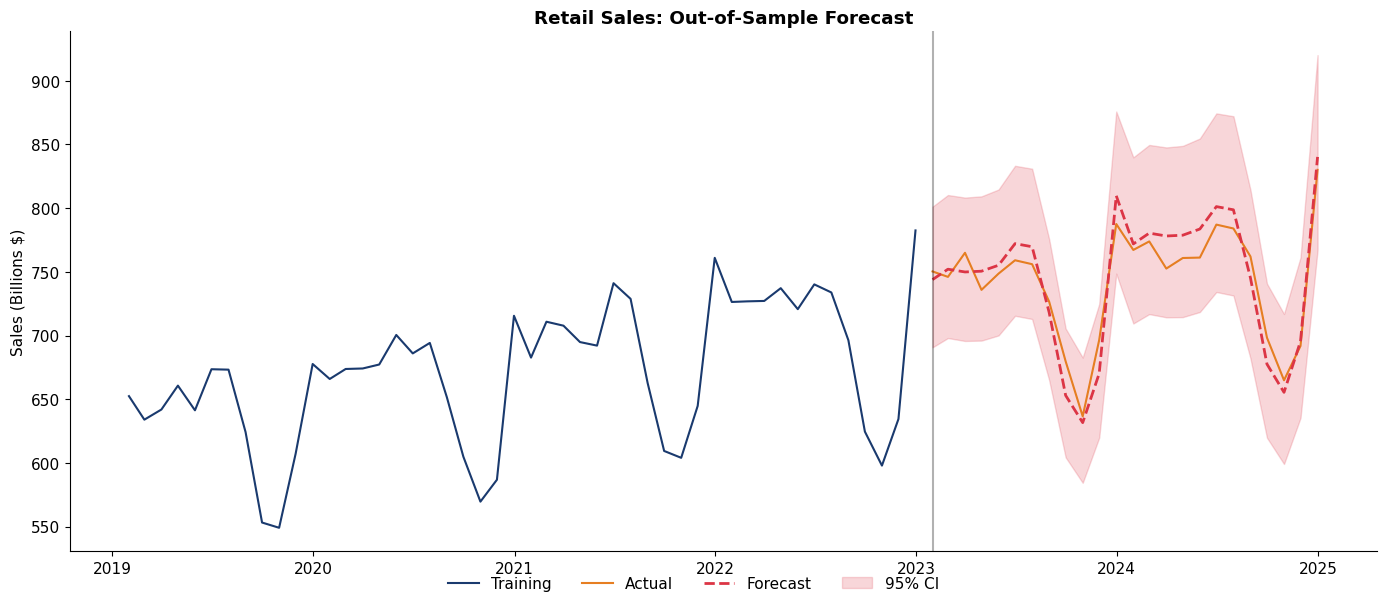

In [41]:
# Forecast and evaluate
fc_log, conf_log = retail_auto.predict(n_periods=len(test), return_conf_int=True)

# Convert back from log
fc = np.exp(fc_log)
conf_lower = np.exp(conf_log[:, 0])
conf_upper = np.exp(conf_log[:, 1])

# Plot
fig, ax = plt.subplots(figsize=(14, 6))

ax.plot(retail.index[:train_end][-48:], train[-48:], color=COLORS['blue'], linewidth=1.5, label='Training')
ax.plot(retail.index[train_end:], test, color=COLORS['orange'], linewidth=1.5, label='Actual')
ax.plot(retail.index[train_end:], fc, color=COLORS['red'], linewidth=2, linestyle='--', label='Forecast')
ax.fill_between(retail.index[train_end:], conf_lower, conf_upper, color=COLORS['red'], alpha=0.2, label='95% CI')

ax.axvline(x=retail.index[train_end], color='black', linestyle='-', alpha=0.3)
ax.set_title('Retail Sales: Out-of-Sample Forecast', fontweight='bold')
ax.set_ylabel('Sales (Billions $)')

handles, labels = ax.get_legend_handles_labels()
fig.legend(handles, labels, loc='lower center', ncol=4, bbox_to_anchor=(0.5, -0.02))
plt.subplots_adjust(bottom=0.15)
plt.tight_layout()
plt.show()

In [42]:
# Accuracy metrics
mape = np.mean(np.abs((test - fc) / test)) * 100
rmse = np.sqrt(np.mean((test - fc)**2))

print(f"\nForecast Accuracy:")
print(f"  MAPE: {mape:.2f}%")
print(f"  RMSE: {rmse:.2f}")


Forecast Accuracy:
  MAPE: 1.86%
  RMSE: 15.54


## Exercise 9: Practice Questions

Answer the following questions based on your analysis:

1. **Why do we use log transformation before fitting SARIMA to airline data?**

2. **What is the difference between seasonal differencing $(1-L^{12})$ and regular differencing $(1-L)$?**

3. **The airline model has only 2 parameters. Why is it so effective?**

4. **How would you modify the SARIMA model for quarterly data?**

5. **Why do seasonal forecast intervals grow more rapidly than non-seasonal ones?**

## Summary

### What We Practiced

1. **Identifying Seasonality**: Visual analysis and seasonal decomposition
2. **Seasonal Differencing**: $(1-L^s)$ operator to remove seasonal patterns
3. **ACF/PACF Analysis**: Pattern recognition at seasonal lags
4. **SARIMA Modeling**: Fitting and comparing different specifications
5. **Diagnostics**: Residual analysis for seasonal models
6. **Forecasting**: Generating seasonal forecasts with confidence intervals

### Key Takeaways

- Multiplicative seasonality → use log transformation
- Often need both d=1 and D=1 for stationarity
- The airline model SARIMA(0,1,1)(0,1,1)[12] is remarkably robust
- ACF/PACF show patterns at seasonal lags (12, 24, 36, ...)
- Always validate with residual diagnostics before forecasting